# Smoothing and finding the signal (Gaussian bumps)

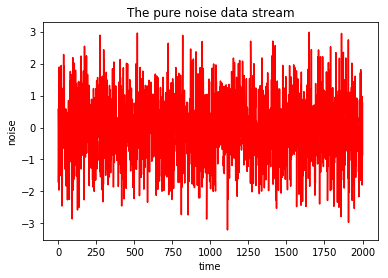

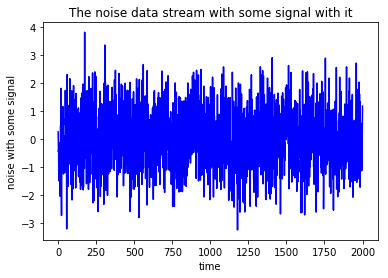

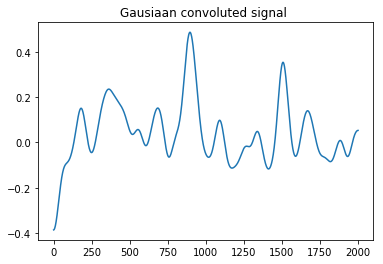

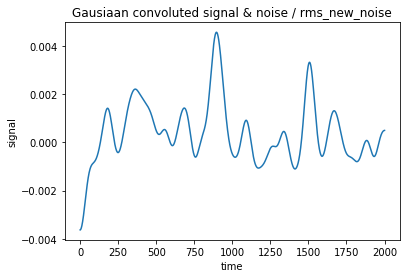

In [7]:
import scipy.ndimage.filters 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
%matplotlib inline


filein = open("hiro.dat","r")
time_data = []     #time 1D list
hiro_data = []      #signal 1D list
for line in filein.readlines():
    tokens = line.split()
    time_data.append(float(tokens[0]))
    hiro_data.append(float(tokens[1]))

filein.close()

filein = open("noise.dat","r")
time_data = []     #time 1D list
noise_data = []      #pure noise 1D list
for line in filein.readlines():
    tokens = line.split()
    time_data.append(float(tokens[0]))
    noise_data.append(float(tokens[1]))

filein.close()

#Now go on and process time_data and signal_data as two separates lists



    

#Plot of the pure noise data stream 2000 elements    
plt.plot(time_data, noise_data, "r")
#mpl.rcParams["figure.figsize"] = (15,10)
plt.xlabel("time")
plt.ylabel("noise")
plt.title("The pure noise data stream")
plt.show()



#plot of the signal with noise data stream 
plt.plot(time_data, hiro_data, "b")
#mpl.rcParams["figure.figsize"] = (15,10)
plt.xlabel("time")
plt.ylabel("noise with some signal")
plt.title("The noise data stream with some signal with it")
plt.show()


sigma = 30.0

#convolve the gaussian noise on pure noise to get rms amplitude?
conv_hiro = scipy.ndimage.filters.gaussian_filter1d(hiro_data, sigma, axis=-1, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)
#conv_noise = scipy.ndimage.filters.gaussian_filter1d(noise_data, 1., axis=-1, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)

plt.plot(time_data, conv_hiro)
plt.title("Gausiaan convoluted signal ")
plt.show()


plt.plot(time_data, conv_hiro * np.sqrt(1.+ 4. * np.pi * sigma**2))
plt.title("Gausiaan convoluted signal & noise / rms_new_noise")
mpl.rcParams["figure.figsize"] = (30,20)
plt.xlabel("time")
plt.ylabel("signal")

plt.show()
